# Evidencia de aprendizaje Clases, Objetos y archivos de datos en Python

**Curso:** Analítica de Datos (andres felipe callejas) 


**Estudiantes:**
* `Angela Maria Builes` `CC 43655771` `angela.builes@est.iudigital.edu.co`
* `Gladis Zulemi Quiroz Londoño` `CC 39210282` `gladis.zulemi@est.iudigital.edu.co`

**Fecha:** 30 de agosto de 2025
**Medellín, Colombia**

---

### Resumen del Proceso

Este script lee datos iniciales de propiedades desde el archivo (datos_catastro_entrada.csv). A partir de ellos, simula y genera 40 nuevos registros con datos de impuestos y valores comerciales estimados. Finalmente, el programa guarda estos 40 registros en un nuevo archivo (datos_catastro_transformados.csv) y crea dos gráficos de barras que se exportan como imágenes para la visualización de los resultados.

In [1]:
import csv
import random
import matplotlib.pyplot as plt


# Creamos listas para guardar cada columna de datos.
# Una lista para los numeros de iteracion, otro para las areas y otro para los valores.
numeros_iteracion = []
areas_terreno = []
valores_catastrales = []


with open('datos_catastro_entrada.csv', 'r') as archivo:
    lector = csv.reader(archivo)

    # saltamos la primera fila, que solo tiene los títulos "Numero_Iteracion", etc.
    next(lector)

    # Ahora, leemos el archivo fila por fila
    for fila in lector:

        # Cada fila es una lista de textos, por ejemplo: ['1', '150', '50000']
        # Tenemos que convertir esos textos a números para poder usarlos en cálculos.
        # El primer dato lo convertimos a número entero 
        
        numeros_iteracion.append(int(fila[0]))

        # El segundo y tercero a número con decimales
        areas_terreno.append(float(fila[1]))
        valores_catastrales.append(float(fila[2]))


print("Números de iteracion:", numeros_iteracion)
print("Áreas de terreno:", areas_terreno)
print("Valores catastrales:", valores_catastrales)

Números de iteracion: [1, 2, 3, 4, 5]
Áreas de terreno: [111.0, 281.0, 120.0, 122.0, 201.0]
Valores catastrales: [11232.0, 11251.0, 10225.0, 12331.0, 10541.0]


In [2]:

# Esta funcion toma un área y un valor, y nos devolverá un impuesto y un valor comercial inventados.

def calcular_valores_simples(area, valor_catastral):
    # Calculo del impuesto: será el 1% del valor, más un numero al azar entre -100 y 250.
    impuesto_calculado = (valor_catastral * 0.01) + random.randint(-100, 250)

    # Cálculo del valor comercial: será el valor catastral, más un extra por el tamaño del terreno,
    # y otro extra al azar.
    valor_comercial_calculado = valor_catastral + (area * 100) + random.randint(1000, 5000)

    # La funcion nos devuelve los dos resultados.
    return impuesto_calculado, valor_comercial_calculado

print("Funcion creada.")

Funcion creada.


In [3]:
# Preparamos nuevos cajones (listas) para guardar los 40 resultados.
nuevos_ids = []
nuevos_impuestos = []
nuevos_valores_comerciales = []

# Hacemos un ciclo que se repite 40 veces del 0 al 39.
for i in range(40):
    # Para no quedarnos sin datos, vamos a reusar los 5 que tenemos.
    
    indice = i % 5

    # Tomamos los datos originales usando el indice
    area_original = areas_terreno[indice]
    valor_original = valores_catastrales[indice]

    # Usamos nuestra funcion le damos los datos originales y nos devuelve los nuevos.
    impuesto_nuevo, valor_comercial_nuevo = calcular_valores_simples(area_original, valor_original)

    # guardamos los resultados en los nuevos cajones.
    nuevos_ids.append(i + 1) # Para que los IDs vayan de 1 a 40
    nuevos_impuestos.append(impuesto_nuevo)
    nuevos_valores_comerciales.append(valor_comercial_nuevo)

print("¡40 datos nuevos generados!")


¡40 datos nuevos generados!


In [4]:
with open('datos_catastro_transformados.csv', 'w', newline='') as archivo_salida:
    escritor = csv.writer(archivo_salida)

    # Primero, escribimos los titulos de las columnas.
    escritor.writerow(['ID_Registro', 'Impuesto_Estimado_USD', 'Valor_Comercial_Estimado'])

    # Ahora, escribimos los 40 datos
    for i in range(40):
        escritor.writerow([
            nuevos_ids[i],
            nuevos_impuestos[i],
            nuevos_valores_comerciales[i]
        ])

print("Archivo 'datos_catastro_transformados.csv' guardado.")

Archivo 'datos_catastro_transformados.csv' guardado.


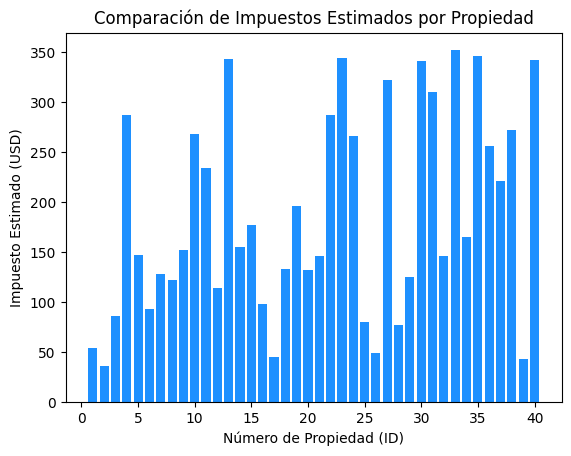

Gráfico de impuestos guardado como 'grafico_impuestos.png'


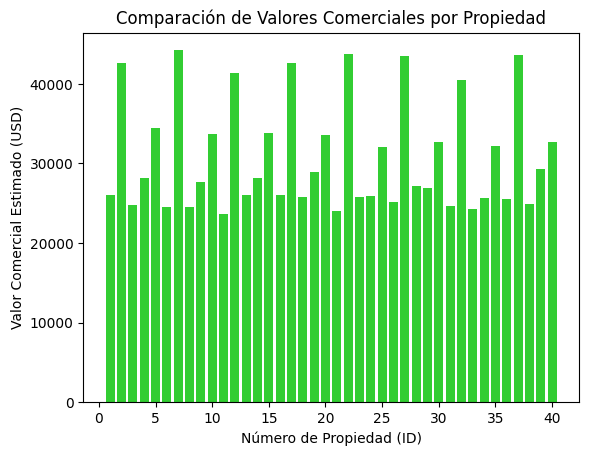

Gráfico de valores comerciales guardado como 'grafico_valores_comerciales.png'


In [6]:
# PRIMER GRÁFICO: IMPUESTOS 

plt.bar(nuevos_ids, nuevos_impuestos, color='dodgerblue')

plt.title('Comparación de Impuestos Estimados por Propiedad')
plt.xlabel('Número de Propiedad (ID)')
plt.ylabel('Impuesto Estimado (USD)')


plt.savefig('grafico_impuestos.png')
plt.show() 

print("Gráfico de impuestos guardado como 'grafico_impuestos.png'")


# SEGUNDO GRÁFICO: VALORES COMERCIALES

# Hacemos lo mismo para el valor comercial
plt.bar(nuevos_ids, nuevos_valores_comerciales, color='limegreen')

plt.title('Comparación de Valores Comerciales por Propiedad')
plt.xlabel('Número de Propiedad (ID)')
plt.ylabel('Valor Comercial Estimado (USD)')

plt.savefig('grafico_valores_comerciales.png')

plt.show()

print("Gráfico de valores comerciales guardado como 'grafico_valores_comerciales.png'")
